# National ID Card Recognition

## Project Overview
In this Capstone project, you'll embark on creating a National ID Card Recognition system using OCR (Optical Character Recognition) technology. The core of this project involves utilizing Tesseract OCR, a renowned open-source OCR engine, to accurately recognize and extract text from images of national ID cards. Additionally, OpenCV, a powerful open-source computer vision library, will be employed to preprocess the images, enhancing their quality for better text recognition. This project aims to provide practical experience with OCR and computer vision techniques, which are pivotal in the realm of artificial intelligence.

## Setup and Installation
Begin by setting up Tesseract OCR and OpenCV in your development environment. Ensure all necessary libraries and dependencies are installed.

In [2]:
import pandas as pd
import cv2
import pytesseract
import re
import numpy as np
from matplotlib import pyplot as plt


## Image Preprocessing
Use OpenCV to load ID card images and implement preprocessing steps such as grayscale conversion, noise reduction, and edge detection. Employ the Find Contours method to accurately isolate the ID card from the background and adjust its perspective.

1- load image

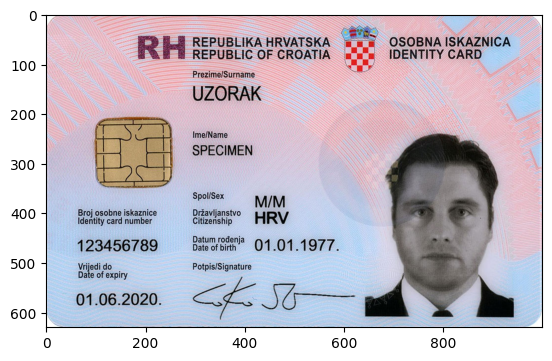

In [3]:
img_path = 'id5.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert image from BGR to RGB 
plt.imshow(img) ### show the image 

2- Image preprocessig by changing from BGR to grayscale then applying gaussian blur to reduce the noise then use canny to detect edges

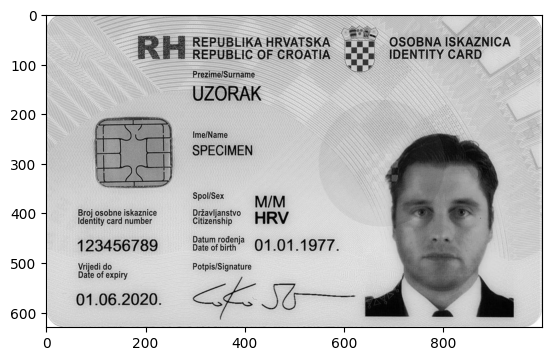

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # convert it to gray scale 
plt.imshow(gray,cmap='gray')

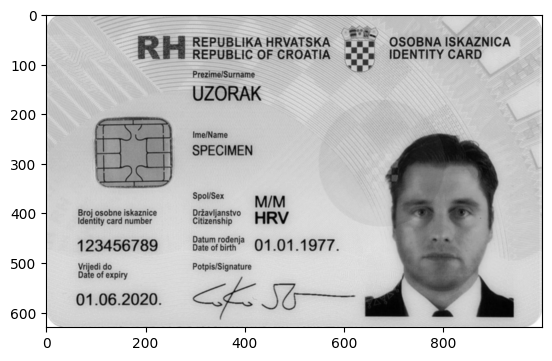

In [5]:
### using guassian filtring 
guassian_blurred = cv2.GaussianBlur(gray, (3, 3), 0) ### using guassian filtring 
plt.imshow(guassian_blurred,cmap='gray')

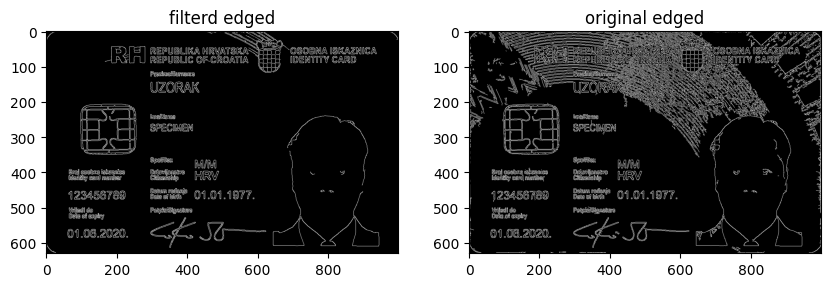

In [6]:
# find  edge usin the Canny edge detector 
original_edged  = cv2.Canny(img, 100, 255)
filterd_edged = cv2.Canny(guassian_blurred, 100, 255)
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize =(10,10))

ax[0].set_title("filterd edged")
ax[1].set_title("original edged")

ax[0].imshow(filterd_edged,cmap='gray')
ax[1].imshow(original_edged,cmap='gray')
plt.show()

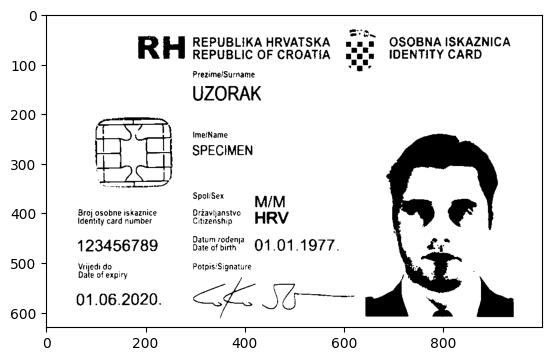

In [7]:
_, th = cv2.threshold(guassian_blurred, 100, 255, cv2.THRESH_BINARY)
plt.imshow(th, 'gray')


### contouring the picture

Number of Contours found = 1


Text(0.5, 1.0, 'Contoured Image')

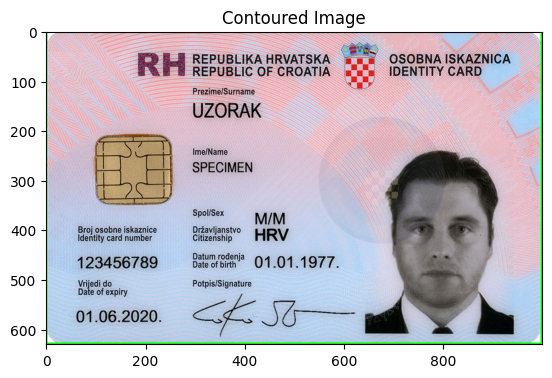

In [8]:
contours, _ = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.imshow('Canny Edges After Contouring', th)
print("Number of Contours found = " + str(len(contours))) 
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', img)
plt.imshow(img)
plt.title('Contoured Image')

## Text Recognition with Tesseract OCR
Pass the preprocessed images to Tesseract OCR for text extraction. Fine-tune Tesseract's parameters to improve accuracy for the specific layout and text style of national ID cards.

In [9]:
text = pytesseract.image_to_string(th)
text

'R\n\nBroj osobne iskaznice\nIdentity card number\n\n123456789\n\nVrijedi do\nDate of expiry\n\n01.06.2020.\n\nREPUBLIKA HRVATSKA\nREPUBLIC OF CROATIA\n\nPrezime/Surname\n\nUZORAK\n\nOSOBNA ISKAZNICA\nIDENTITY CARD\n\nImeiName\n\nSPECIMEN\n\nSpoliSex M/M\nbri\n\nchasmna” HRV\n\nD C\n\nBateot oh 01.01.1977.\n\nPotpis!Signature\n\n'

In [38]:
card_number = '\d{9}'
sex = '\Sex \w\W\w'
expired = '\d\.\d+\.\d+'
birth_date = '\\W\\d+\\W\\d+\\W\\d+'
surname = 'ame\\n\\n\w+'
name = 'Name\\n\\n\w+'
republic = '\\n\w+\s\w+\s\w+'

In [39]:
import re

republic_regex = r'republic'
republic_match = re.search(republic_regex, text)
republic_value = republic_match.group() if republic_match else None

In [40]:
republic_match = re.search(republic, text)
republic_value = republic_match.group()[5:] if republic_match else None

# birthdate_match = re.search(birth_date, text)
# birthdate_value = birthdate_match.group()[8:] if birthdate_match else None

data = [{
    'republic' : republic_value,
    'card_number' : re.search(card_number, text).group(),
    'surname' : re.search(surname, text).group()[6:],
    'name' : re.search(name, text).group()[6:],
    'sex' : re.search(sex, text).group()[4:],
    'birthdate': re.search(birth_date, text).group().replace('\n', ''),
    'expired' : re.search(expired, text).group()
}]

In [41]:
df = pd.DataFrame(data)

In [42]:
df.head()

,republic,card_number,surname,name,sex,birthdate,expired
0,osobne iskaznice,123456789,ZORAK,SPECIMEN,M/M,01.06.2020,1.06.2020


## Documentation and Sample Uploads
Document the project process, including code, methodologies, and testing procedures. Provide sample ID card images and demonstrate the system's capability to process them and output structured data.

### Conclusion
This project demonstrates the creation of a National ID Card Recognition system using OCR and computer vision techniques. By utilizing Tesseract OCR and OpenCV, we have developed a system capable of extracting and structuring text data from images of national ID cards.